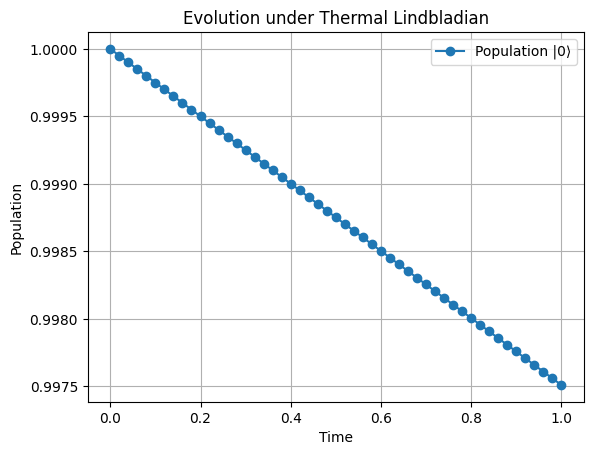

In [1]:
import numpy as np
from qutip import *

def evolve_rho_over_time(omega, gamma, beta, dt, steps):
    """
    Evolves the initial density matrix under the Lindbladian dynamics over time.

    Parameters:
        omega (float): Qubit frequency
        gamma (float): Base decay rate
        beta (float): Inverse temperature (1/kT)
        dt (float): Time step
        steps (int): Number of time steps

    Returns:
        list of Qobj: List of density matrices over time
    """
    # Pauli operators
    sz = sigmaz()
    sm = sigmam()
    sp = sigmap()

    # Hamiltonian
    H = -0.5 * omega * sz

    # Jump operators
    L1 = np.sqrt(gamma * np.exp(beta * omega)) * sm  # excitation
    L2 = np.sqrt(gamma) * sp                         # relaxation

    # Liouvillian
    L = liouvillian(H, [L1, L2])

    # Initial state: |0><0|
    # rho0 = basis(2, 0) * basis(2, 0).dag()
    rho0 = basis(2, 1) * basis(2, 1).dag()
    rho_t = rho0
    rho_list = [rho0]

    # Time evolution
    for _ in range(steps):
        # Use matrix exponential for superoperator evolution: ρ(t+dt) = exp(L * dt) * ρ(t)
        U = (L * dt).expm()
        rho_t_vec = operator_to_vector(rho_t)
        rho_t_vec = U * rho_t_vec
        rho_t = vector_to_operator(rho_t_vec)
        rho_list.append(rho_t)

    return rho_list

# Example: simulate for 100 steps of 0.05 time units
evolution = evolve_rho_over_time(omega=1.0, gamma=0.1, beta=1.0, dt=0.0005, steps=50)

# Plot population of |0⟩ over time
import matplotlib.pyplot as plt

pop1 = [rho[1, 1].real for rho in evolution]
times = np.linspace(0, 1, len(pop1))

plt.plot(times, pop1, "-o", label="Population |0⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Evolution under Thermal Lindbladian")
plt.grid(True)
plt.legend()
plt.show()

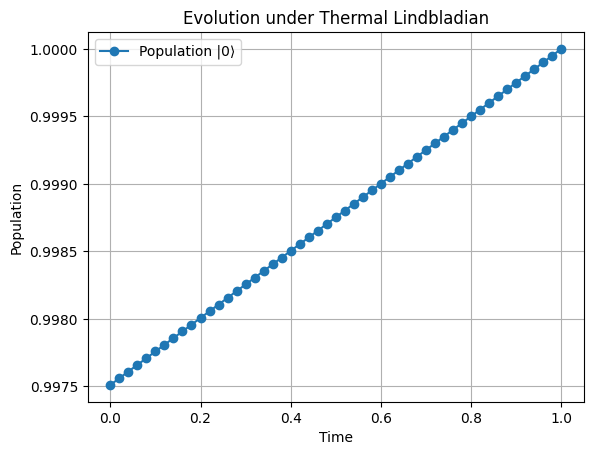

In [2]:
import numpy as np
from qutip import *

def evolve_rho_over_time(omega, gamma, beta, dt, steps):
    """
    Evolves the initial density matrix under the Lindbladian dynamics over time.

    Parameters:
        omega (float): Qubit frequency
        gamma (float): Base decay rate
        beta (float): Inverse temperature (1/kT)
        dt (float): Time step
        steps (int): Number of time steps

    Returns:
        list of Qobj: List of density matrices over time
    """
    # Pauli operators
    sz = sigmaz()
    sm = sigmam()
    sp = sigmap()

    # Hamiltonian
    H = -0.5 * omega * sz

    # Jump operators
    L1 = np.sqrt(gamma * np.exp(beta * omega)) * sm  # excitation
    L2 = np.sqrt(gamma) * sp                         # relaxation

    # Liouvillian
    L = (-1)*liouvillian(H, [L1, L2])

    # Initial state: |0><0|
    rho0 = evolution[-1]
    # rho0 = basis(2, 1) * basis(2, 1).dag()
    rho_t = rho0
    rho_list = [rho0]

    # Time evolution
    for _ in range(steps):
        # Use matrix exponential for superoperator evolution: ρ(t+dt) = exp(L * dt) * ρ(t)
        U = (L * dt).expm()
        rho_t_vec = operator_to_vector(rho_t)
        rho_t_vec = U * rho_t_vec
        rho_t = vector_to_operator(rho_t_vec)
        rho_list.append(rho_t)

    return rho_list

# Example: simulate for 100 steps of 0.05 time units
evolution = evolve_rho_over_time(omega=1.0, gamma=0.1, beta=1.0, dt=0.0005, steps=50)

# Plot population of |0⟩ over time
import matplotlib.pyplot as plt

pop1 = [rho[1, 1].real for rho in evolution]
times = np.linspace(0, 1, len(pop1))

plt.plot(times, pop1, '-o', label="Population |0⟩")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Evolution under Thermal Lindbladian")
plt.grid(True)
plt.legend()
plt.show()
